# **Problem Statement:**

### National Grid ESO is the electricity system operator for Great Britain. They have gathered information of the electricity demand in Great Britain from 2009. The is updated twice an hour, which means 48 entries per day. This makes this dataset ideal for time series forecasting.

# **Objective**

### Our Goal here is to forecast the Maximum Electricity Demand for half hour in a Day. This will help to know about the Maximum Requirement in a Day thus helping to utilise the resources efficiently.

### Since our data is a bihourly data, we 2 have observations for every hour, thus making 48 observations in a day. We thus resampled our data from bihourly to daily data.


### Our Analysis would help to achieve following objectives:

1.  **Resource Allocation:** It helps in efficiently allocating resources
such as power generation capacity, fuel, and manpower to meet the expected demand. Overestimating can lead to unnecessary costs, while underestimating can result in shortages and disruptions.
2.   **Energy Planning:** Forecasting demand is essential for long-term energy planning. It allows policymakers and energy companies to make informed decisions regarding investments in new infrastructure, renewable energy integration, and demand-side management programs.
3.   **Cost Management:** Accurate demand forecasting helps in cost management by optimizing the use of expensive peak-load power plants. It also enables better management of energy trading and pricing strategies in electricity markets.
4.   **Environmental Impact:** Efficiently managing electricity demand contributes to reducing the environmental impact of power generation. By aligning supply with demand, it minimizes the need for inefficient and polluting backup power sources.


# **About Data**

### Our data begins from *1st January, 2009 and goes uptill date 7th March, 2024.*

### Columns in our Dataset and their Description are as follows:



1.   **Settlement_Date:** Date of when electricity demand was recorded.
2.   **Settlement_Time:** Time of the Day when the demand was recorded.
3.   **SETTLEMENT_PERIOD:** A index ranging from 1 to 48 assigned to each observation of a day.
4.   **Period Hour:** The hour at which the data point was recorded
4.   **ND (National Demand):** National Demand is the sum of metered generation, but excludes generation required to meet station load, pump storage pumping and interconnector exports. National Demand is calculated as a sum of generation based on National Grid ESO operational generation metering. Measured in MW.
5.   **TSD (Transmission System Demand):** Transmission System Demand is equal to the ND plus the additional generation required to meet station load, pump storage pumping and interconnector exports. Measured in MW.
ENGLAND_WALES_DEMAND. England and Wales Demand, as ND above but on an England and Wales basis. Measured in MW.
6.   **EMBEDDED_WIND_GENERATION:** This is an estimate of the GB wind generation from wind farms which do not have Transmission System metering installed. These wind farms are embedded in the distribution network and invisible to National Grid ESO. Their effect is to suppress the electricity demand during periods of high wind. The true output of these generators is not known so an estimate is provided based on National Grid ESO's best model. Measured in MW.
7.    **EMBEDDED_WIND_CAPACITY:** This is National Grid ESO’s best view of the installed embedded wind capacity in GB. This is based on publicly available information compiled from a variety of sources and is not the definitive view. It is consistent with the generation estimate provided above. Measured in MW.
8.   **EMBEDDED_SOLAR_GENERATION.** This is an estimate of the GB solar generation from PV panels. These are embedded in the distribution network and invisible to National Grid ESO. Their effect is to suppress the electricity demand during periods of high radiation. The true output of these generators is not known so an estimate is provided based on National Grid ESO's best model. Measured in MW.
9.    **EMBEDDED_SOLAR_CAPACITY.** As embedded wind capacity above, but for solar generation. Measured in MW.
10.   **NON_BM_STOR** (Non-Balancing Mechanism SHort-Term Operating Reserve). For units that are not included in the ND generator definition. This can be in the form of generation or demand reduction. Measured in MW.
11.   **PUMP_STORAGE_PUMPING.** The demand due to pumping at hydro pump storage units; the -ve signifies pumping load.
12.   **IFA_FLOW** (IFA Interconnector Flow). The flow on on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
13.   **IFA2_FLOW** (IFA Interconnector Flow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
14.   **MOYLE_FLOW** (Moyle Interconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
15.   **EAST_WEST_FLOW** (East West Innterconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
16.   **NEMO_FLOW** (Nemo Interconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
17.   **IS Holiday**: A boolean data type column stating 1 if Holiday or 0 if not a Holiday.


#  **IMPORTING LIBRARIES NECESSARY**

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00


In [ ]:
pip install pymannkendall

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import seasonal_decompose
import datetime
import pymannkendall as pk
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

# **DATA IMPORTING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/finaldf.csv')

In [ ]:
df = data[['settlement_date','tsd', 'period_hour']]

In [ ]:
df.head(5)

,settlement_date,tsd,period_hour
0,01-01-2009,38704,00:00:00
1,01-01-2009,38964,00:30:00
2,01-01-2009,38651,01:00:00
3,01-01-2009,37775,01:30:00
4,01-01-2009,37298,02:00:00


# **DATA EXPLORATION**

In [ ]:
df.shape

(265410, 3)

In [ ]:
df.dtypes

settlement_date    object
tsd                 int64
period_hour        object
dtype: object



---


Changing the settlement_date column to datetime object


---



In [ ]:
df['settlement_date'] = pd.to_datetime(df['settlement_date'])

<ipython-input-10-3bbfea5501cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['settlement_date'] = pd.to_datetime(df['settlement_date'])


In [ ]:
df.dtypes

settlement_date    datetime64[ns]
tsd                         int64
period_hour                object
dtype: object

### **Setting Date Column as Index Column**

In [ ]:
df.set_index('settlement_date', inplace = True)

### **Checking for Null Values**

In [ ]:
df.isna().any()

tsd            False
period_hour    False
dtype: bool

### **Checking for Missing Dates**

In [ ]:
missing_dates = pd.date_range(start=df.index.min(), end = df.index.max()).difference(df.index)
if len(missing_dates) == 0:

  print("There are no missing dates in the data")
else:
  print("Missing dates are present and they are: ", missing_dates)
print("Total number of missing dates are: ", len(missing_dates))

Missing dates are present and they are:  DatetimeIndex(['2009-08-29', '2009-08-30', '2010-07-09', '2010-07-10',
               '2010-07-13', '2010-07-14', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01', '2012-06-02', '2012-06-03',
               '2012-06-04', '2012-06-11', '2012-10-14'],
              dtype='datetime64[ns]', freq=None)
Total number of missing dates are:  15


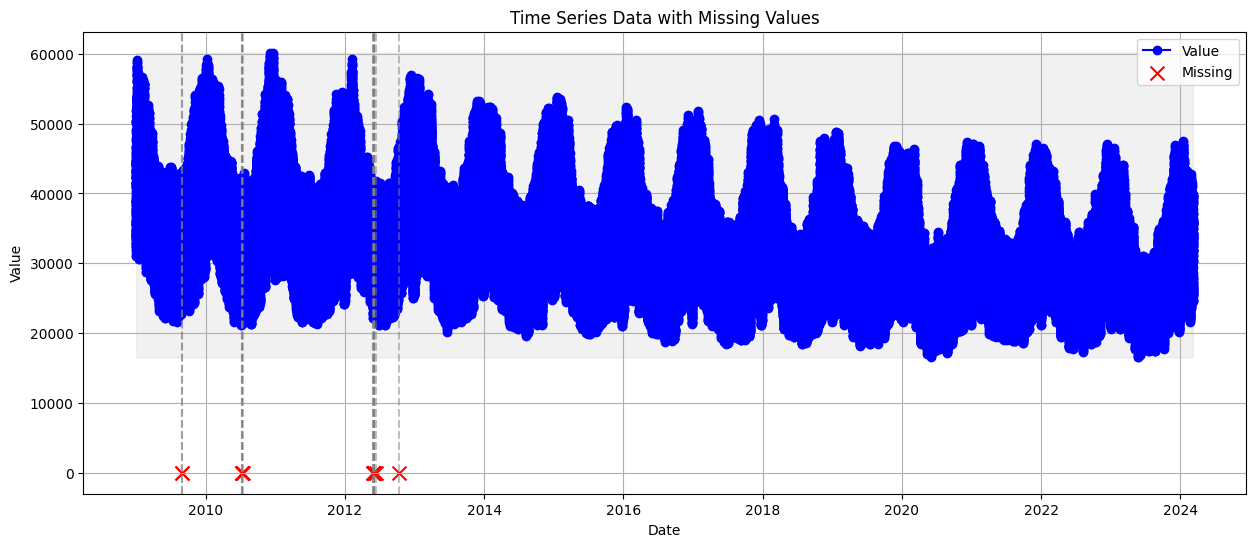

In [ ]:
plt.figure(figsize=(15, 6))

# Plot the main time series
plt.plot(df.index, df['tsd'], linestyle='-', marker='o', color='blue', label='Value')

# Plot missing values as separate points
#missing_dates = df[df['value'].isnull()].index
plt.scatter(missing_dates, np.repeat(0, len(missing_dates)), color='red', marker='x', s=100, label='Missing')

# Highlight the periods before and after missing dates
for missing_date in missing_dates:
    plt.axvline(missing_date, color='gray', linestyle='--', alpha=0.5)

# Fill the area between two lines to highlight periods
plt.fill_between(df.index, df['tsd'].min(), df['
tsd'].max(), where=~df['tsd'].isnull(), color='lightgray', alpha=0.3)

plt.title('Time Series Data with Missing Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.show()

### **Visualzing the Entire Dataset**

Text(0.5, 1.0, 'Total Bi Hourly Demand for 15 Years')

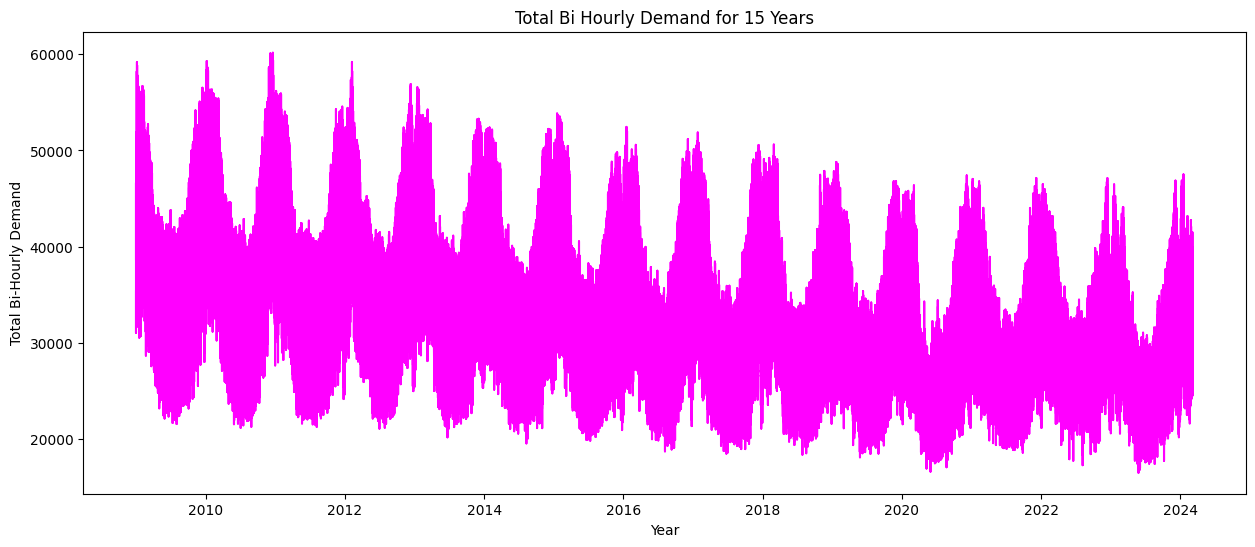

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df['tsd'], color='magenta')
plt.xlabel('Year')
plt.ylabel('Total Bi-Hourly Demand')
plt.title('Total Bi Hourly Demand for 15 Years')

**Interpretation:** A decreasing trend can be observed over the period of 15 years, also a yearly seasonality is observed since same pattern is repeating for each year.

# **Converting Data into Daily Data where we take the value of Maximum Demand seen in a day, thus converting a bihourly data into Daily Data**

In [ ]:
dfm = df.resample('D').max()
dfm.head(3)

,tsd,period_hour
settlement_date,,
2009-01-01,46634.0,23:30:00
2009-01-02,51876.0,23:30:00
2009-01-03,50422.0,23:30:00


Text(0.5, 1.0, 'Total Maximum Daily Demand for 15 Years')

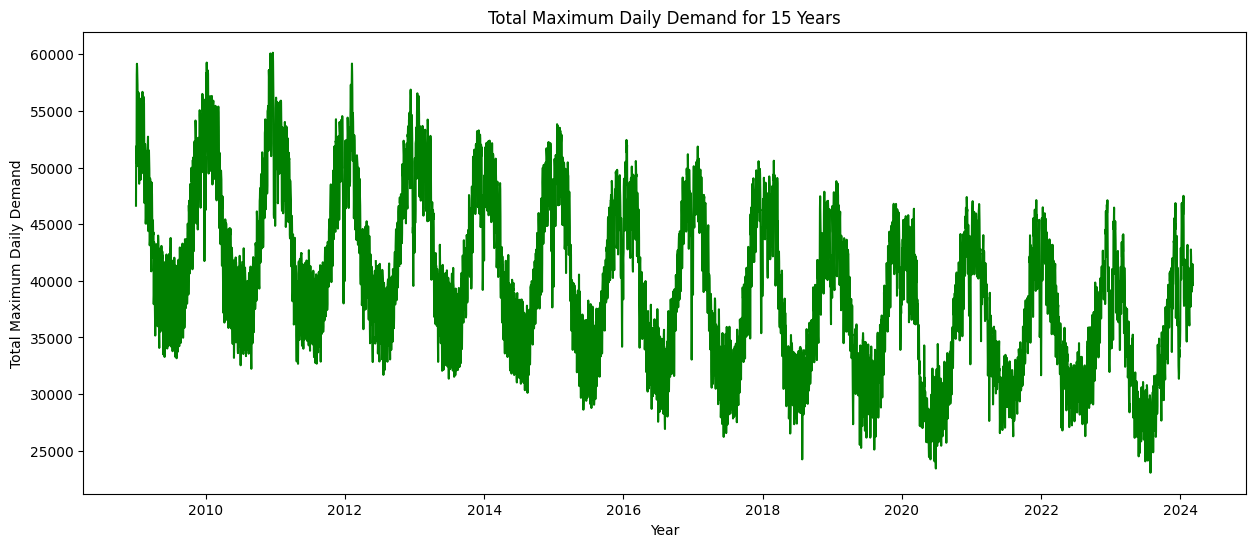

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dfm['tsd'], color='green')
plt.xlabel('Year')
plt.ylabel('Total Maximum Daily Demand')
plt.title('Total Maximum Daily Demand for 15 Years')

# **ABOUT DAILY DATA**

In [ ]:
dfm.shape

(5545, 2)

Our data shape is thus reduced from 265410 to 5545 rows.

### **Checking for Null Values**

In [ ]:
dfm.isna().sum()

tsd            15
period_hour    15
dtype: int64

In [ ]:
null_mask = dfm.isnull().any(axis=1)
null_rows = dfm[null_mask]

(null_rows)

,tsd,period_hour
settlement_date,,
2009-08-29,NaN,NaN
2009-08-30,NaN,NaN
2010-07-09,NaN,NaN
2010-07-10,NaN,NaN
2010-07-13,NaN,NaN
2010-07-14,NaN,NaN
2012-05-29,NaN,NaN
2012-05-30,NaN,NaN
2012-05-31,NaN,NaN


**These are the dates where the data is missing.**

In [ ]:
null_rows.shape

(15, 2)

**Thus, we have in total 15 dates where data is missing**

**Let us visualize the first segment of the missing date which is on 29-08-2009 to 30-08-2009**

In [ ]:
segment = dfm.loc['2009-08-19':'2009-09-10']

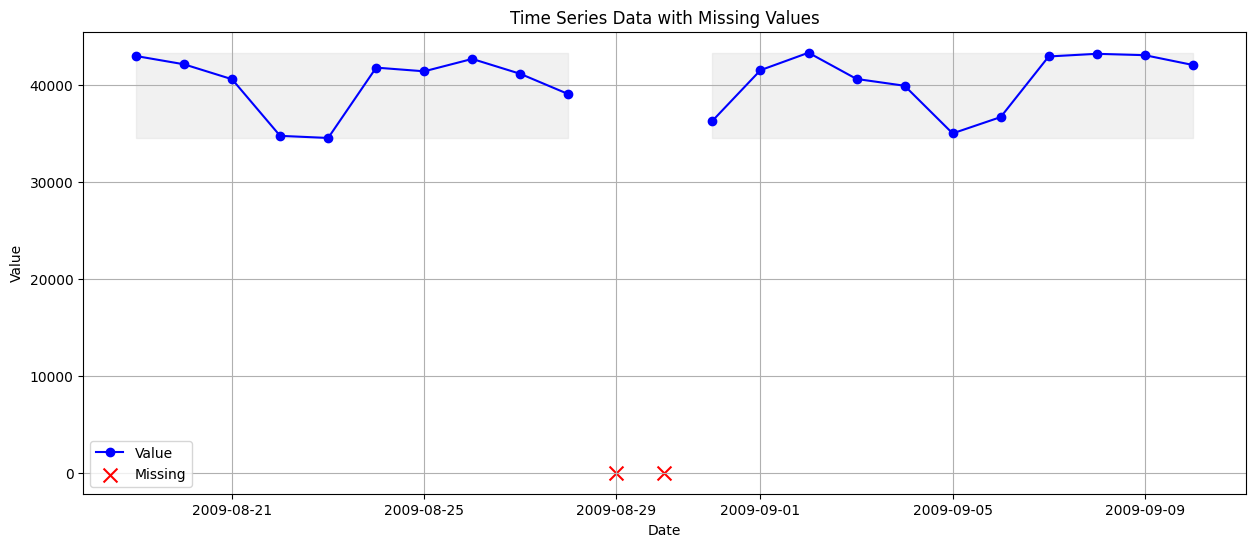

In [ ]:
missing_dates = ['2009-08-29', '2009-08-30']
plt.figure(figsize=(15, 6))

# Plot the main time series
plt.plot(segment.index, segment['tsd'], linestyle='-', marker='o', color='blue', label='Value')

# Plot missing values as separate points
#missing_dates = df[df['value'].isnull()].index
plt.scatter(missing_dates, np.repeat(0, len(missing_dates)), color='red', marker='x', s=100, label='Missing')


# Fill the area between two lines to highlight periods
plt.fill_between(segment.index, segment['tsd'].min(), segment['tsd'].max(), where=~segment['tsd'].isnull(), color='lightgray', alpha=0.3)

plt.title('Time Series Data with Missing Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.show()

**As we can observe, there are two missing dates here. We can interpolate them by joining a line between existing data points. This can be done by applying the method of linear interpolation.**

In [ ]:
segment_interpolate = segment.interpolate(method='linear')

In [ ]:
v_i = segment_interpolate.loc['2009-08-28':'2009-08-30']

In [ ]:
v_i

,tsd,period_hour
settlement_date,,
2009-08-28,39023.0,23:30:00
2009-08-29,38106.0,NaN
2009-08-30,37189.0,NaN


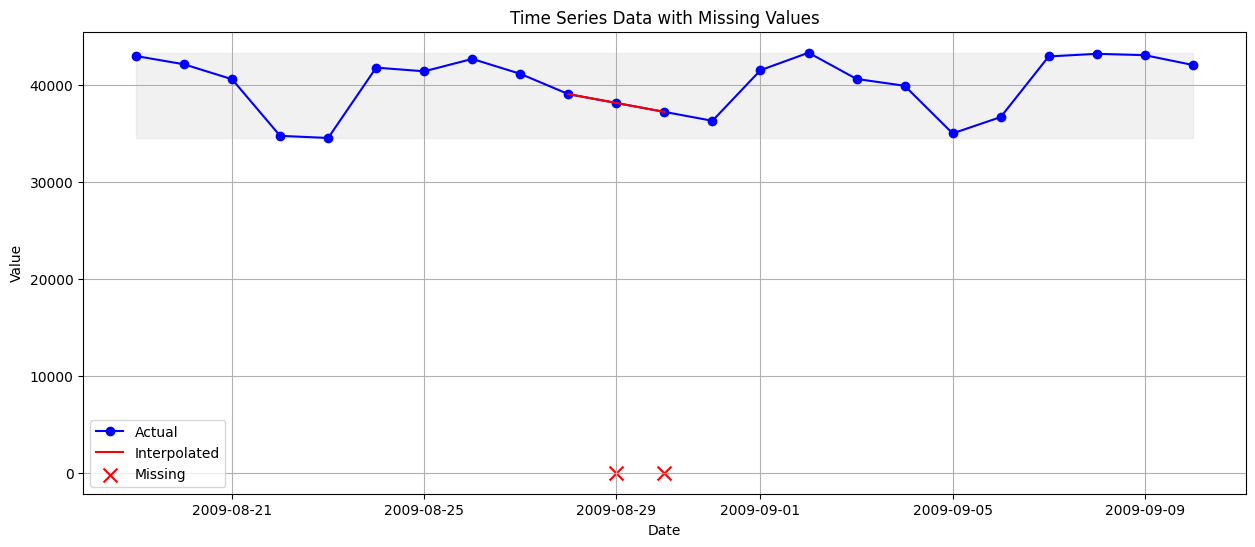

In [ ]:
plt.figure(figsize=(15, 6))
# Plot the main time series
plt.plot(segment_interpolate.index, segment_interpolate['tsd'], linestyle='-', marker='o', color='blue', label='Actual')
plt.plot(v_i.index, v_i['tsd'], color='red', label='Interpolated')

# Plot missing values as separate points
#missing_dates = df[df['value'].isnull()].index
plt.scatter(missing_dates, np.repeat(0, len(missing_dates)), color='red', marker='x', s=100, label='Missing')

# Highlight the periods before and after missing dates
#for missing_date in missing_dates:
 #   plt.axvline(missing_dates, color='gray', linestyle='--', alpha=0.5)

# Fill the area between two lines to highlight periods
plt.fill_between(segment_interpolate.index, segment_interpolate['tsd'].min(), segment_interpolate['tsd'].max(), where=~segment_interpolate['tsd'].isnull(), color='lightgray', alpha=0.3)

plt.title('Time Series Data with Missing Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.show()

**Here, we can observe that the missing values are interpolated using a linear equation.**

### **Interpolating the Entire Daily Demand Dataframe**

In [ ]:
dfm.interpolate(method='linear', inplace = True)

Now, crosschecking for any null values presence

In [ ]:
dfm.tsd.isnull().sum()

0

# **TIME SERIES ANALYSIS PART 1**

## **Visualizing the interpolated data**

Text(0.5, 1.0, 'Total Maximum Daily Demand for 15 Years')

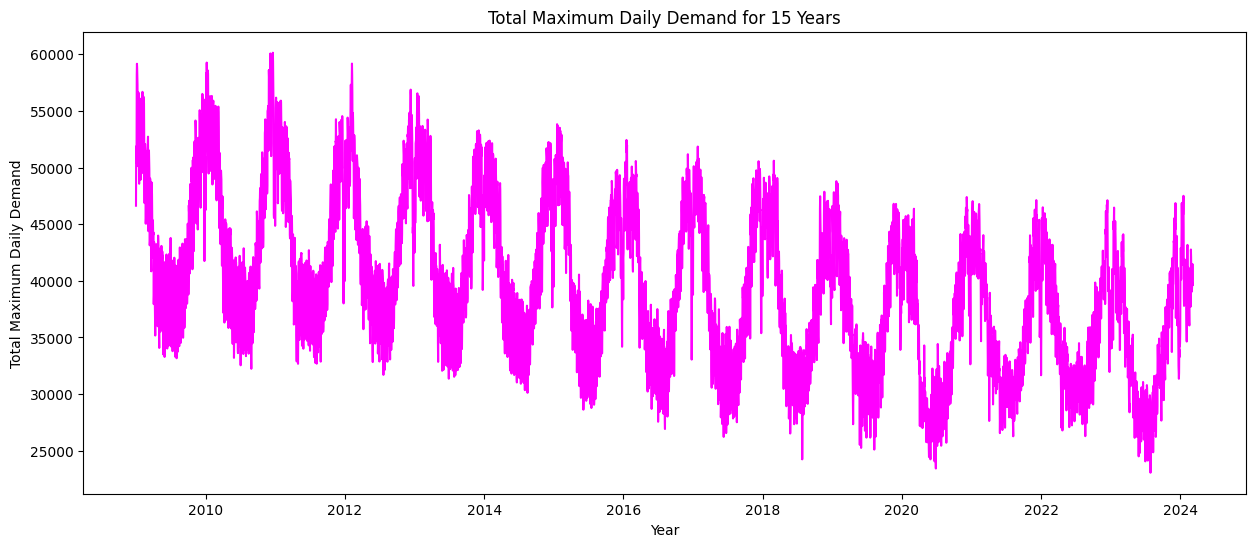

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dfm['tsd'], color='magenta')
plt.xlabel('Year')
plt.ylabel('Total Maximum Daily Demand')
plt.title('Total Maximum Daily Demand for 15 Years')

## **Seasonally Decomposing the Data**

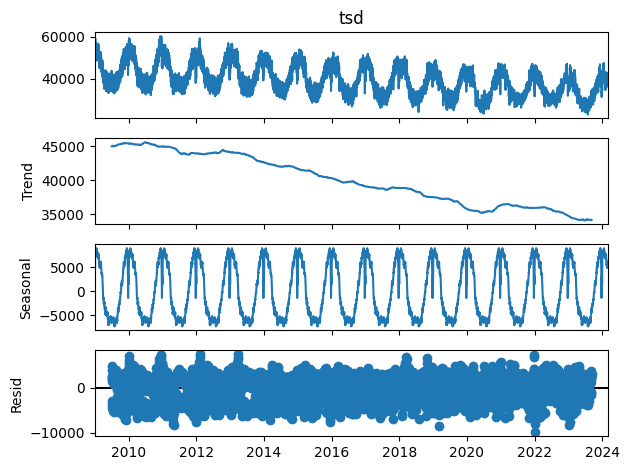

<Figure size 1500x800 with 0 Axes>

In [ ]:
result = seasonal_decompose(dfm['tsd'], model = "additive",period=365)
result.plot()
plt.figure(figsize=(15,8))
plt.show()

**Here, we choose additive model because there is constant variation in change in each of the season.**

## **PYMANKENDALL Test**

Here, H0: There is no monotonic trend in the data.

H1: There exist a trend.

If the p-value is less than the significance level (p < 0.05), it suggests strong evidence to reject the null hypothesis. This indicates a statistically significant trend in the data.

If the p-value is greater than the significance level (p ≥ 0.05), it suggests insufficient evidence to reject the null hypothesis. This means there is no statistically significant trend in the data.

In [ ]:
pk.original_test(dfm['tsd'])

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-37.43434117619096, Tau=-0.33524729453494106, s=-5152999.0, var_s=18948706083.666668, slope=-2.2705115376897433, intercept=46231.857982475965)

Here, p value is less than 0.05, indicating that we reject the null hypothesis.Thus a significant trend is present in the data

## **Kruskal Wallis Test for Seasonality**

The Kruskal-Wallis test provides evidence of seasonality since the p-value associated with the test statistic is below the chosen significance level. A low p-value suggests that there are significant differences between the groups, warranting the existence of seasonality.

In [ ]:
def seasonality_test(series,pr):
  seasonal=False
  idx=np.arange(len(series.index))% pr
  H_statistic,p_value=kruskal(series,idx)
  if p_value<=0.05:
    seasonal=True
    print("p-value ",p_value)
  return seasonal

seasonality_test(dfm['tsd'],365)

p-value  0.0


True

**Here, p value is less than 0.05, thus we reject the null hypothesis indicating that seasonality is present in the data.**

## Stationarity Test

**Stationarity means that the statistical properties of a time series i.e. mean, variance and covariance do not change over time.**

### **ADF Test**

Null Hypothesis (HO): Series is non-stationary, or series has a unit root.

Alternate Hypothesis(HA): Series is stationary, or series has no unit root.


In [ ]:
adf_result = adfuller(dfm['tsd'])

# Printing the results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -4.15370339466968
p-value: 0.0007884325363355059
Critical Values:
   1%: -3.4315371436261284
   5%: -2.8620645998185408
   10%: -2.567049243278508


**Here, p value is less than 0.05, indicating that we reject the null hypothesis, ie. series is stationary. TREND STATIONARY AS ITS LINEAR**

### **KPSS TEST**


Null Hypothesis (HO): Series is trend stationary or series has no unit root.

Alternate Hypothesis(HA): Series is non-stationary, or series has a unit root.


In [ ]:
kpss_result = kpss(dfm['tsd'])

# Printing the results
print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Lags Used:', kpss_result[2])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print(f'   {key}: {value}')

KPSS Statistic: 4.0984790795077055
p-value: 0.01
Lags Used: 43
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


<ipython-input-36-89642954a2cf>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(dfm['tsd'])


**Here, p value is less than 0.05, indicating that we reject Null Hypothesis.
That means, our data is non stationary.**

**Since here KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is then to be checked for stationarity.**

## **ACF**

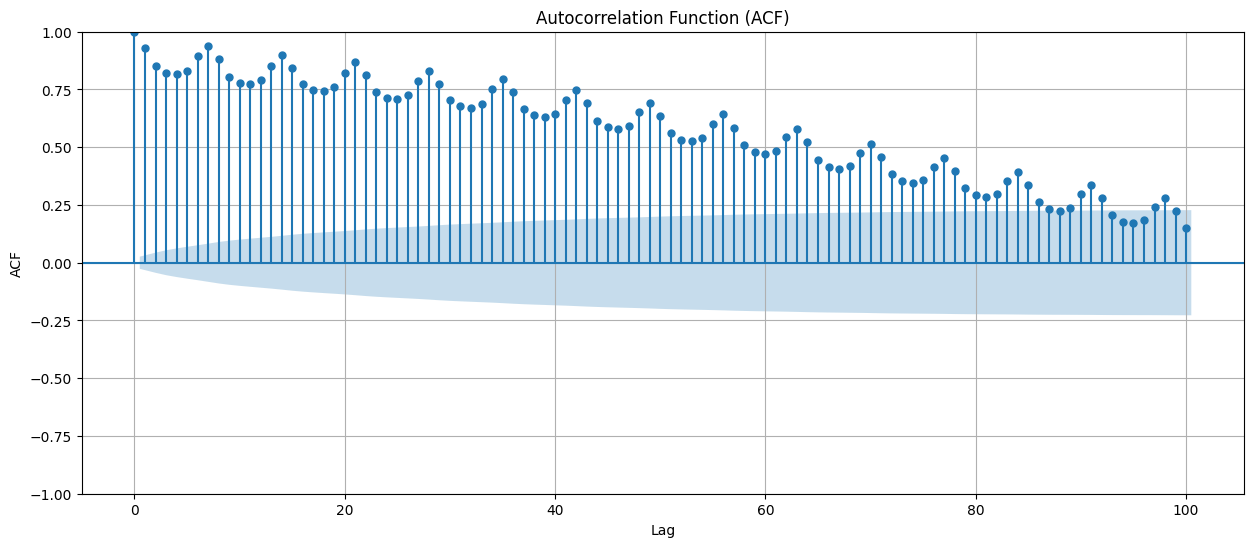

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(dfm['tsd'], lags=100, ax = ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

**Here, we can observe that the auto correlations are positive and are not going to zero very fast, hence the series is not stationary. Also, there is repeated pattern in the graph, indicating that there is seasonality present in the data. We have large ACF Valus for lag 7, 14, and so on multiples of 7.**

## **PACF**

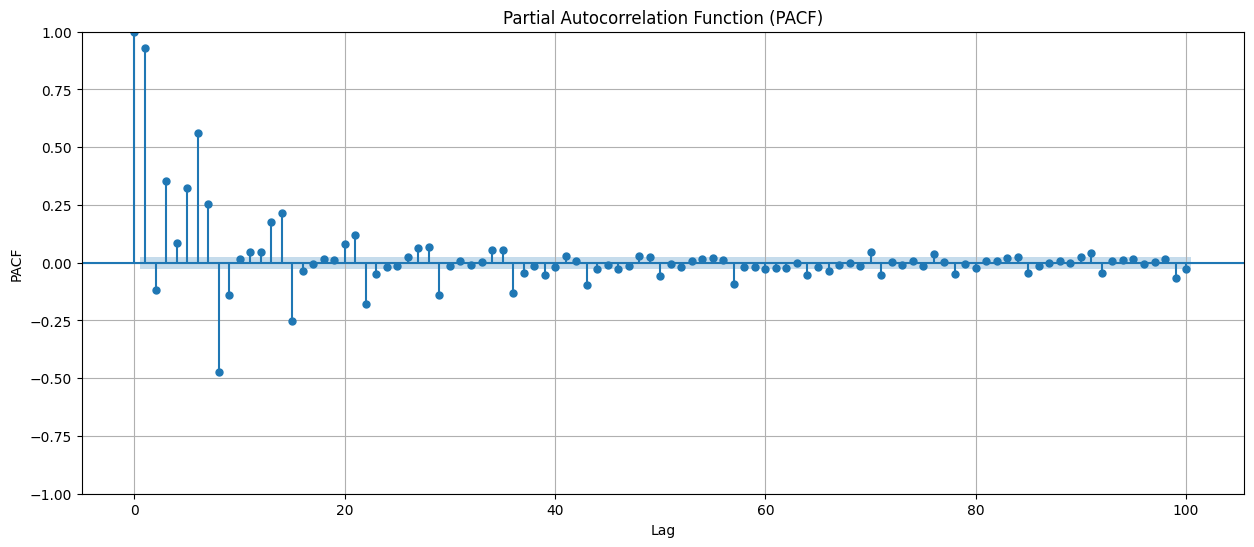

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(dfm['tsd'], lags=100, ax=ax)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

**PACF shows high spike at lag 1,3,5,6 and 7. After around lag 36, PACFs start to go to zero quickly.**

## **Non-Seasonally Differencing the Series with Lag 7**

In [ ]:
dfm['nsdiff'] = dfm['tsd'] - dfm['tsd'].shift(7)

In [ ]:
nsdfm = dfm.iloc[7:]

In [ ]:
nsdfm.shape

(5538, 3)

In [ ]:
nsdfm.head(2)

,tsd,period_hour,nsdiff
settlement_date,,,
2009-01-08,57800.0,23:30:00,11166.0
2009-01-09,57312.0,23:30:00,5436.0


### **Time Plot**

Text(0.5, 1.0, 'Non Seasonal Differencing With Lag 7')

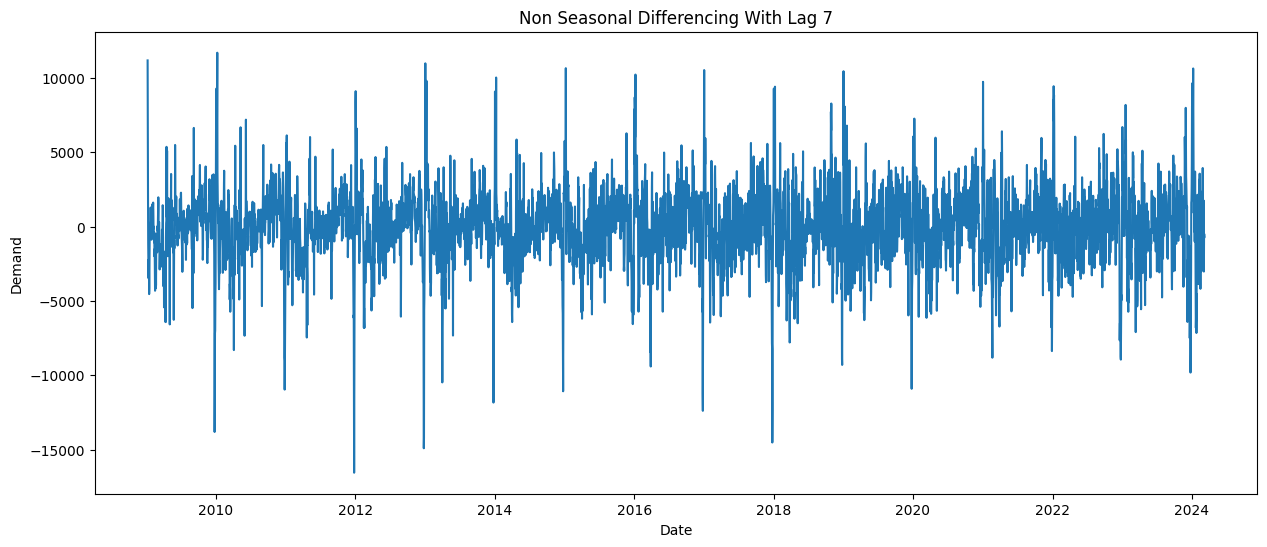

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(nsdfm['nsdiff'])
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Non Seasonal Differencing With Lag 7')

**We can observe that the series has now become mean stationary. Variance stationarity can also be almost seen**

### **ACF OF Non Seasonal Differenced Data with Lag 7**

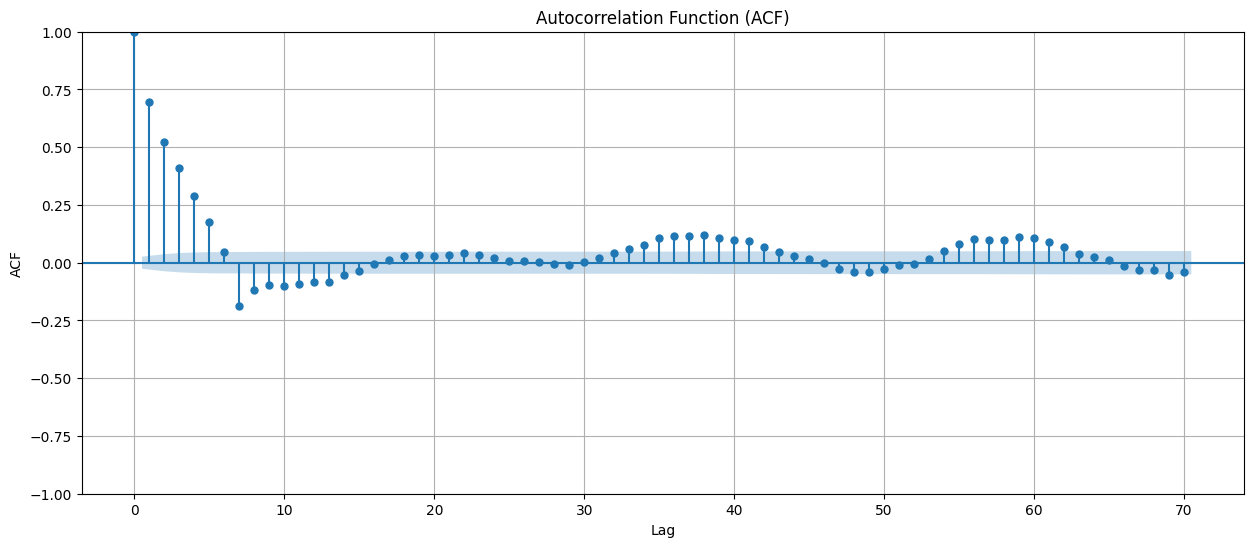

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(nsdfm['nsdiff'], lags=70, ax = ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

**Here, the autocorrelations are going to zero after lag 8. Linear Decay + Sine Wave Pattern is observed in the graph indicating possibility of AR (2) Model.**

### **PACF of Non Seasonal Differenced Data with Lag 7**

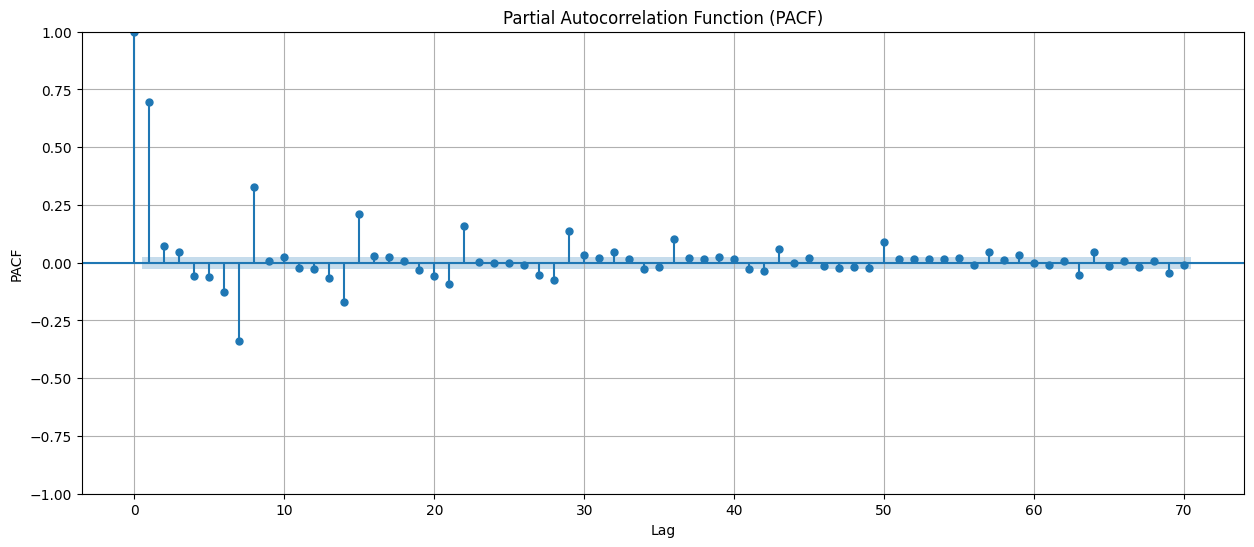

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(nsdfm['nsdiff'], lags=70, ax=ax)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

**Here, even after differencing the series once, we observe high partial autocorrelation at seasonal lags. At lag 7, 14.. and so on. That means there is still high autocorrelation between weekly lags even after removing the effect of intermediate lags.**

### **Performing ADF and KPSS test on LAG 7 non seasonal differenced data**

In [ ]:
result = adfuller(nsdfm['nsdiff'])

# Printing the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -10.956970437360628
p-value: 8.513802638362948e-20
Critical Values:
   1%: -3.4315386541431767
   5%: -2.8620652671839455
   10%: -2.5670495985385364


**Here, p value is less than 0.05 indicating we reject the null hypothesis. This implies that data is trend stationary**

In [ ]:
result2 = kpss(nsdfm['nsdiff'])

# Printing the results
print('KPSS Statistic:', result2[0])
print('p-value:', result2[1])
print('Lags Used:', result2[2])
print('Critical Values:')
for key, value in result2[3].items():
    print(f'   {key}: {value}')

KPSS Statistic: 0.0288475055120308
p-value: 0.1
Lags Used: 32
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


<ipython-input-47-e558cc90b466>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result2 = kpss(nsdfm['nsdiff'])


**Here, p value is greater than 0.05 indicating we fail to reject null hypothesis. That implies that data is stationary.**

## **Non Seasonally Differencing the Series with Lag 7 + Non Seasonally Differencing the Series with Lag 1**

In [ ]:
dfm['nsnsdiff'] = dfm['nsdiff'] - dfm['nsdiff'].shift(1)

In [ ]:
nsnsdfm = dfm.iloc[8:]

In [ ]:
nsnsdfm.shape

(5537, 4)

In [ ]:
nsnsdfm.head(2)

,tsd,period_hour,nsdiff,nsnsdiff
settlement_date,,,,
2009-01-09,57312.0,23:30:00,5436.0,-5730.0
2009-01-10,52718.0,23:30:00,2296.0,-3140.0


### **Time Plot**

Text(0.5, 1.0, 'Non Seasonal Differencing With Lag 7 + Non Seasonal Differencing with Lag 1')

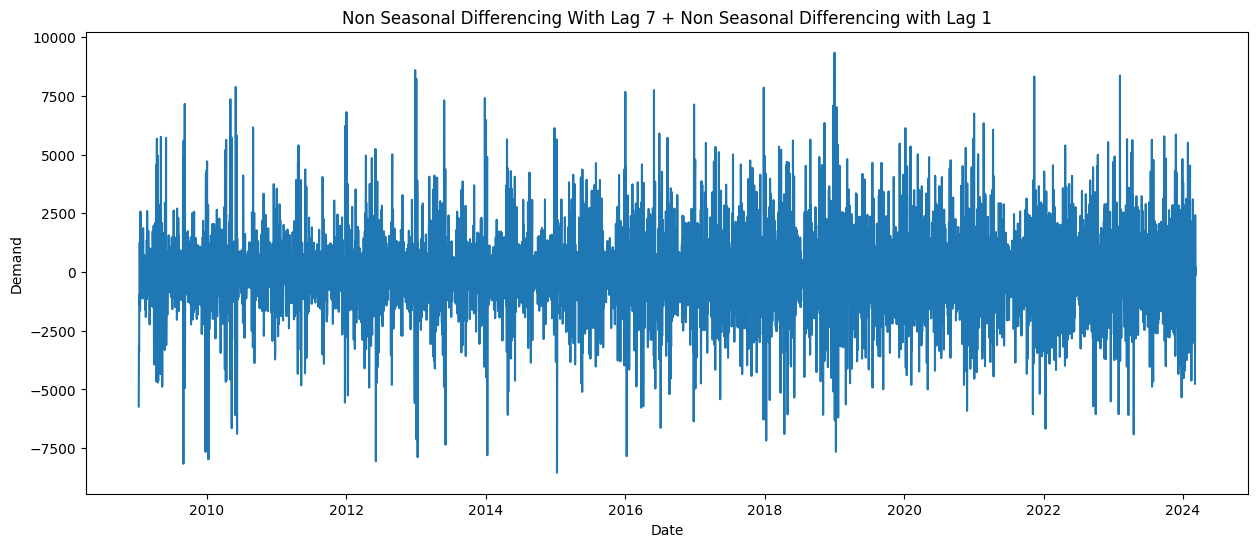

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(nsnsdfm['nsnsdiff'])
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Non Seasonal Differencing With Lag 7 + Non Seasonal Differencing with Lag 1')

**We can observe that the series has now become mean stationary. Variance stationarity can also be almost seen, its better than before.**

### **ACF OF Non Seasonal Differenced Data with Lag 7 + Non Seasonally Differencing the Series with Lag 1**

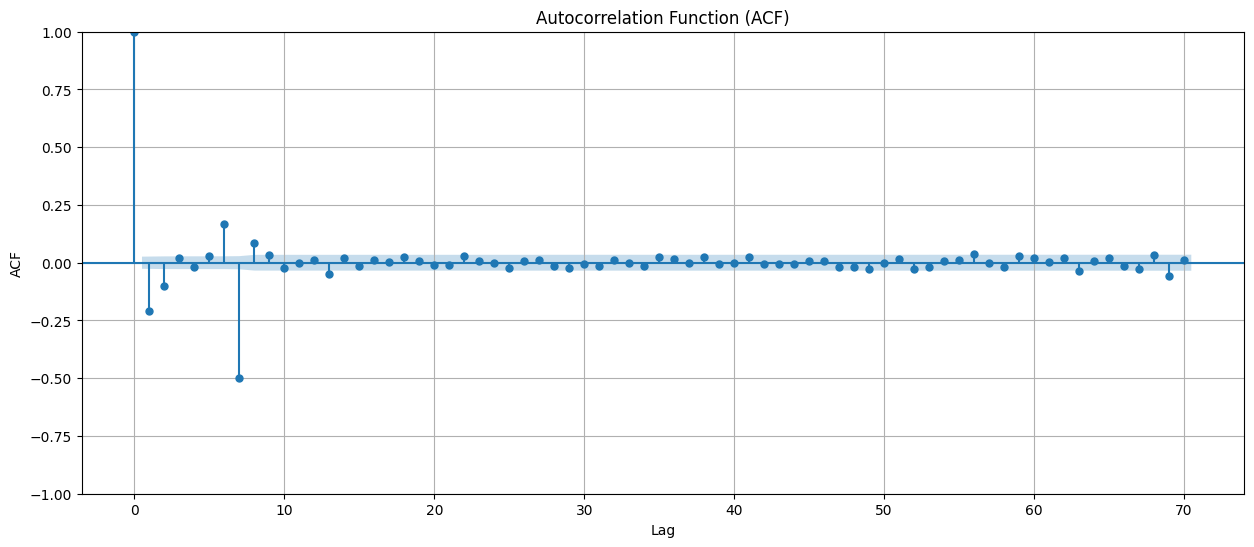

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(nsnsdfm['nsnsdiff'], lags=70, ax = ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

**Here, the autocorrelations are significant at lag 1, 2, 6 and largely at lag 7.**

### **PACF of Non Seasonal Differenced Data with Lag 7 + Non Seasonally Differencing the Series with Lag 1**

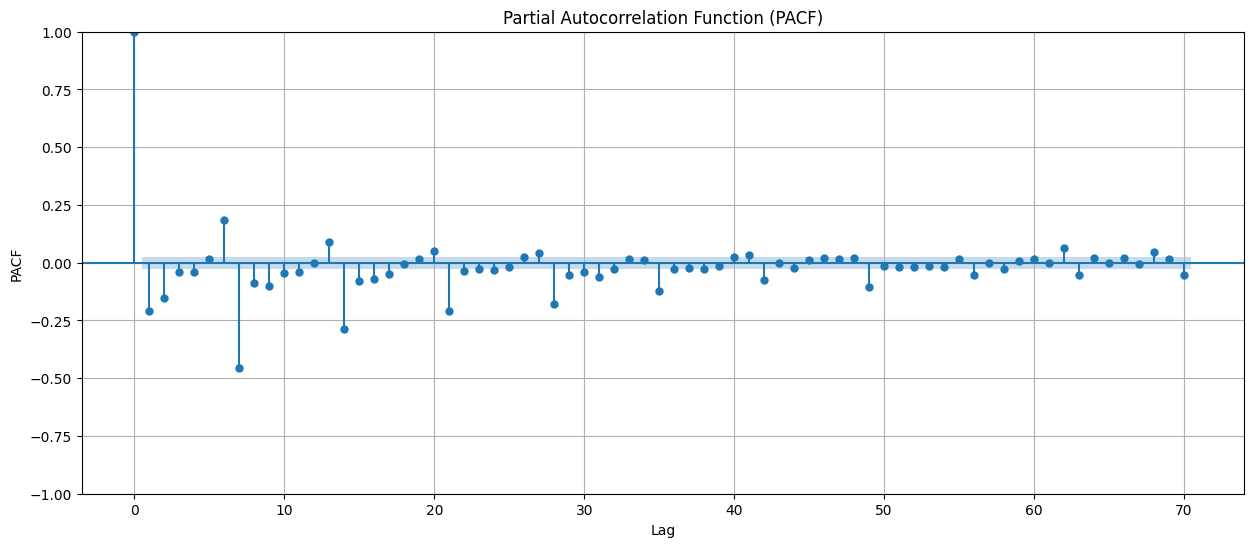

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(nsnsdfm['nsnsdiff'], lags=70, ax=ax)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

**Here, after differencing the series twice, we observe high partial autocorrelation at seasonal lags. At lag 7, 14, 21, 28, 35... and so on. That means there is still high autocorrelation between weekly lags even after removing the effect of intermediate lags.**

### **Performing ADF and KPSS test on LAG 7 non seasonal differenced data + Non Seasonally Differencing the Series with Lag 1**

In [ ]:
result = adfuller(nsnsdfm['nsnsdiff'])

# Printing the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -24.553315882428983
p-value: 0.0
Critical Values:
   1%: -3.4315384381197256
   5%: -2.862065171742092
   10%: -2.5670495477317705


**Here, p value is less than 0.05 indicating we reject the null hypothesis. This implies that data is trend stationary**

In [ ]:
result2 = kpss(nsnsdfm['nsnsdiff'])

# Printing the results
print('KPSS Statistic:', result2[0])
print('p-value:', result2[1])
print('Lags Used:', result2[2])
print('Critical Values:')
for key, value in result2[3].items():
    print(f'   {key}: {value}')

KPSS Statistic: 0.0205184522992672
p-value: 0.1
Lags Used: 30
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


<ipython-input-56-49d49876b9f9>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result2 = kpss(nsnsdfm['nsnsdiff'])


**Here, p value is greater than 0.05 indicating we fail to reject null hypothesis. That implies that data is stationary.**

# **AUTO ARIMA MODEL ON 7 LAG DIFFERENCED DATA**

In [ ]:
from pmdarima.arima import auto_arima

# Use auto_arima to find the best parameters
model = auto_arima(nsdfm['nsdiff'], seasonal=True, trace = True, m = 7)

# Print the best ARIMA parameters
print("Best ARIMA Parameters:", model.order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=32.73 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=102206.389, Time=0.13 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=97176.070, Time=4.53 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=99153.496, Time=5.45 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=102204.673, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=98501.264, Time=0.64 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=96735.550, Time=12.84 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=96126.914, Time=28.38 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=14.22 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=40.82 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=inf, Time=30.78 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=101975.059, Time=7.55 sec
 ARIMA(2,0,0)(2,0,1)[7] intercept   : AIC=96053.784, Time=36.79 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=16.44 sec
 ARIMA(2,0,0)(2,0,0)[7] intercept   : 

In [ ]:
train_size = int(len(nsdfm) * 0.8)  # 80% for training
train_data, test_data = nsdfm.iloc[:train_size], nsdfm.iloc[train_size:]

## **ARIMA (2,0,0) Model**

In [ ]:
# Fit ARIMA model
order = (2, 0, 0)  # (p, d, q) order of ARIMA model
model = ARIMA(train_data['nsdiff'], order=order)
result = model.fit()

In [ ]:
ap = result.predict()

In [ ]:
predicted = result.predict(start=test_data.index.min(), end=test_data.index.max())

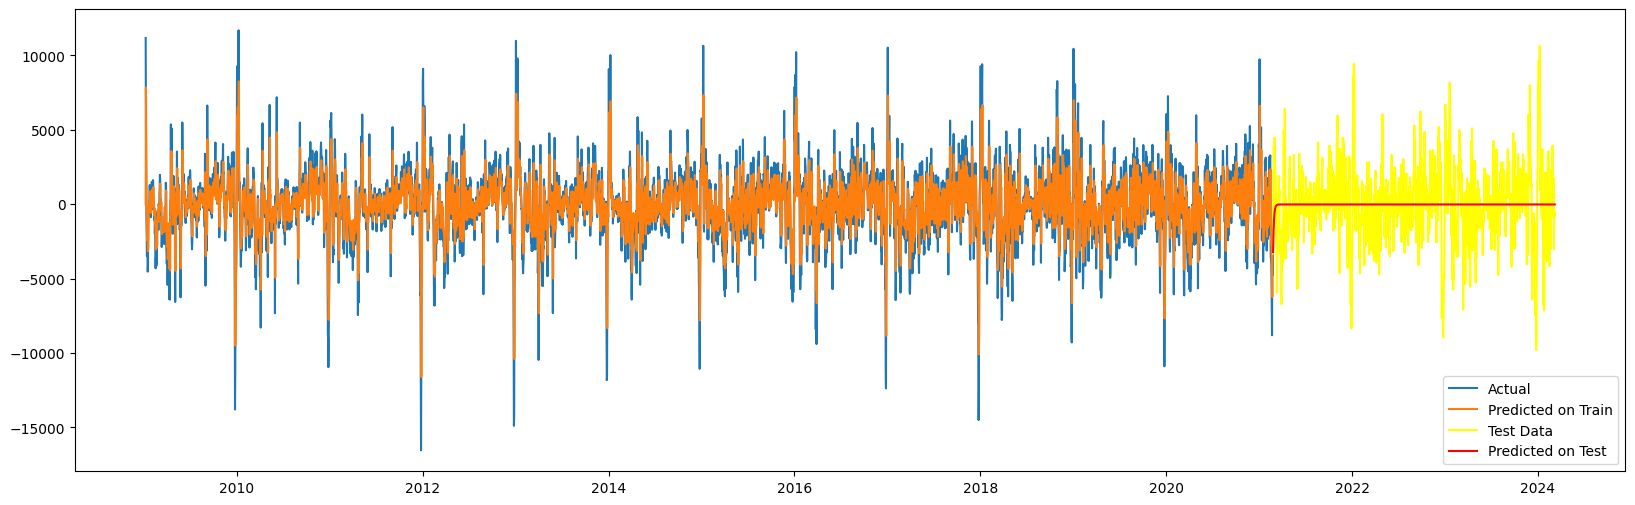

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(train_data['nsdiff'],label='Actual')
plt.plot(ap,label='Predicted on Train')
plt.plot(test_data['nsdiff'], label='Test Data', color='yellow')
plt.plot(predicted,label='Predicted on Test', color='red')
plt.legend()

## **SARIMA (2,0,0)(2,0,1) Model**

In [ ]:
order = (2, 0, 0)  # ARIMA parameters (p, d, q)
seasonal_order = (2, 0, 1, 7)  # SARIMA parameters (P, D, Q, s)

# Fit the SARIMA model
model = SARIMAX(nsdfm['nsdiff'], order=order, seasonal_order=seasonal_order)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
sp = results.predict()

In [ ]:
predicted = results.predict(start=test_data.index.min(), end=test_data.index.max())

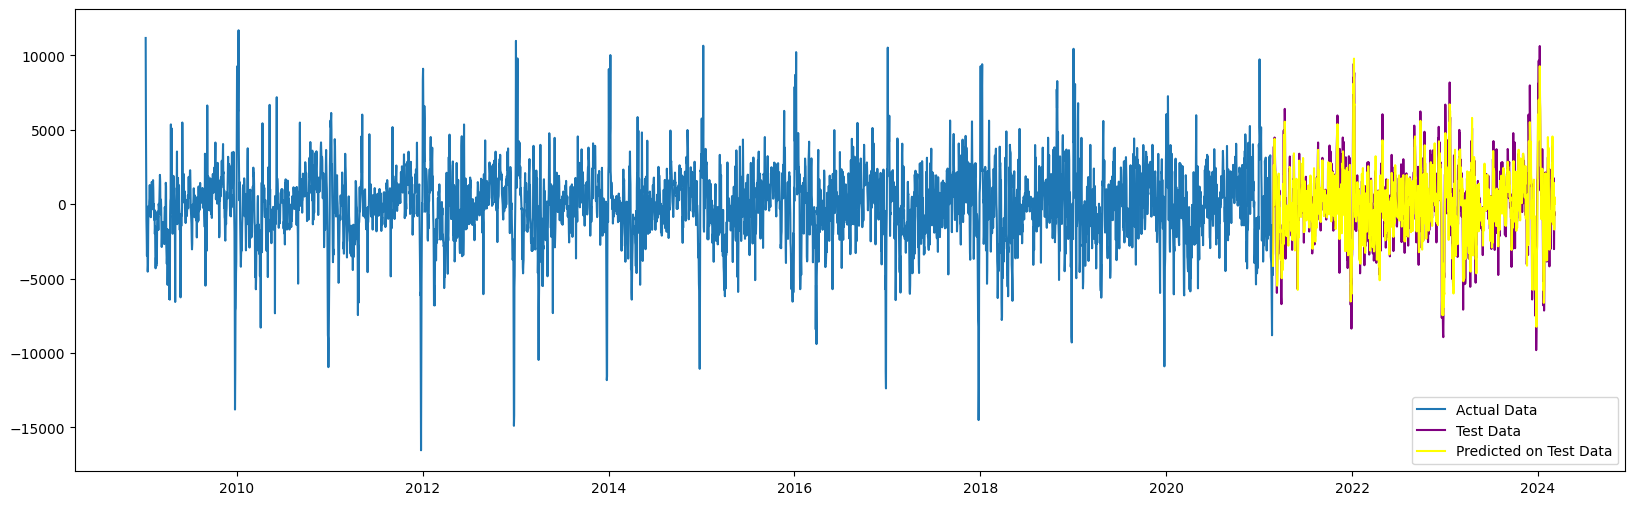

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(train_data['nsdiff'],label='Actual Data')
#plt.plot(sp,label='Predicted on Train Data')
plt.plot(test_data['nsdiff'], label='Test Data', color='purple')
plt.plot(predicted,label='Predicted on Test Data', color='yellow')
plt.legend()

# **AUTO ARIMA ON THE ORIGINAL DATA**

In [ ]:
# Use auto_arima to find the best parameters
model = auto_arima(dfm['tsd'], seasonal=True, trace = True, m = 7)

# Print the best ARIMA parameters
print("Best ARIMA Parameters:", model.order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=30.00 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=103256.949, Time=0.24 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=98896.751, Time=5.57 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=101119.320, Time=7.62 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=103254.950, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=103222.005, Time=0.35 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=97862.494, Time=11.99 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=97657.484, Time=30.28 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=17.42 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=30.93 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=inf, Time=26.50 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=45.78 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=37.51 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=inf, Time=41.05 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=97052.

In [ ]:
train_size = int(len(dfm) * 0.8)  # 80% for training
train_data, test_data = dfm.iloc[:train_size], dfm.iloc[train_size:]

## **ARIMA MODEL (0, 1, 1)**

In [ ]:
order = (0, 1, 1)

model = ARIMA(train_data['tsd'], order=order)
result = model.fit()

In [ ]:
sp = result.predict()

In [ ]:
#dftry = test_data.head(30)

In [ ]:
predicted = result.predict(start=test_data.index.min(), end=test_data.index.max())

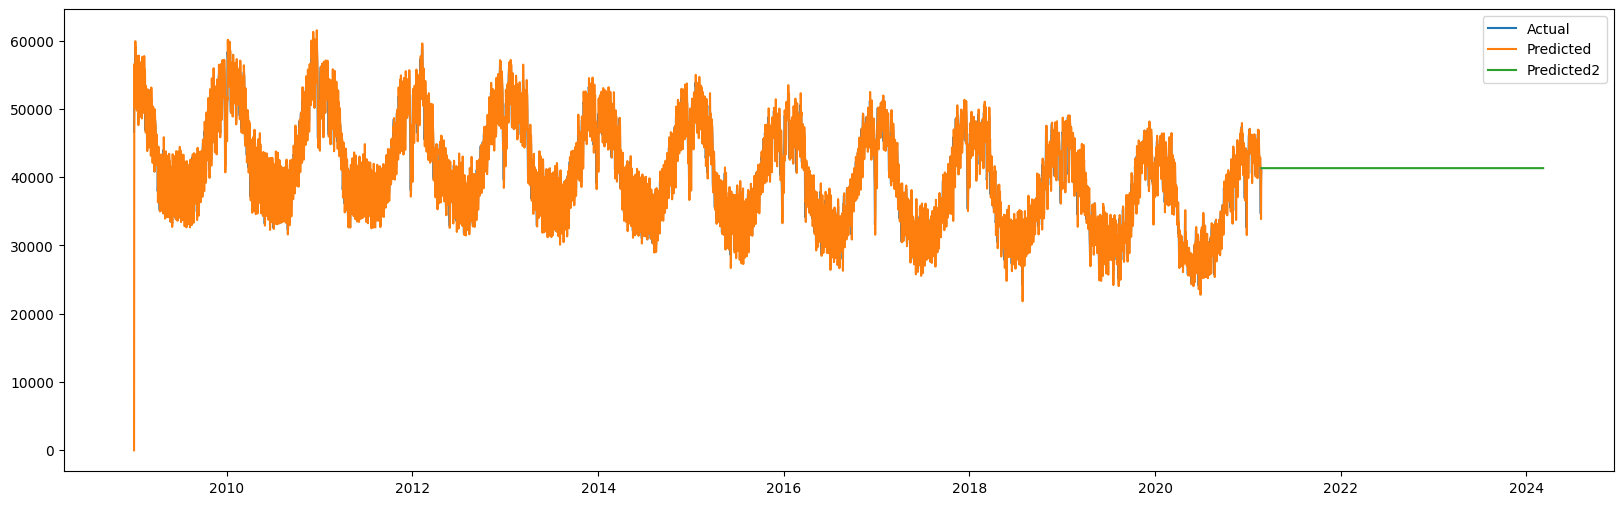

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(train_data['tsd'],label='Actual')
plt.plot(sp,label='Predicted')
plt.plot(predicted,label='Predicted2')
plt.legend()

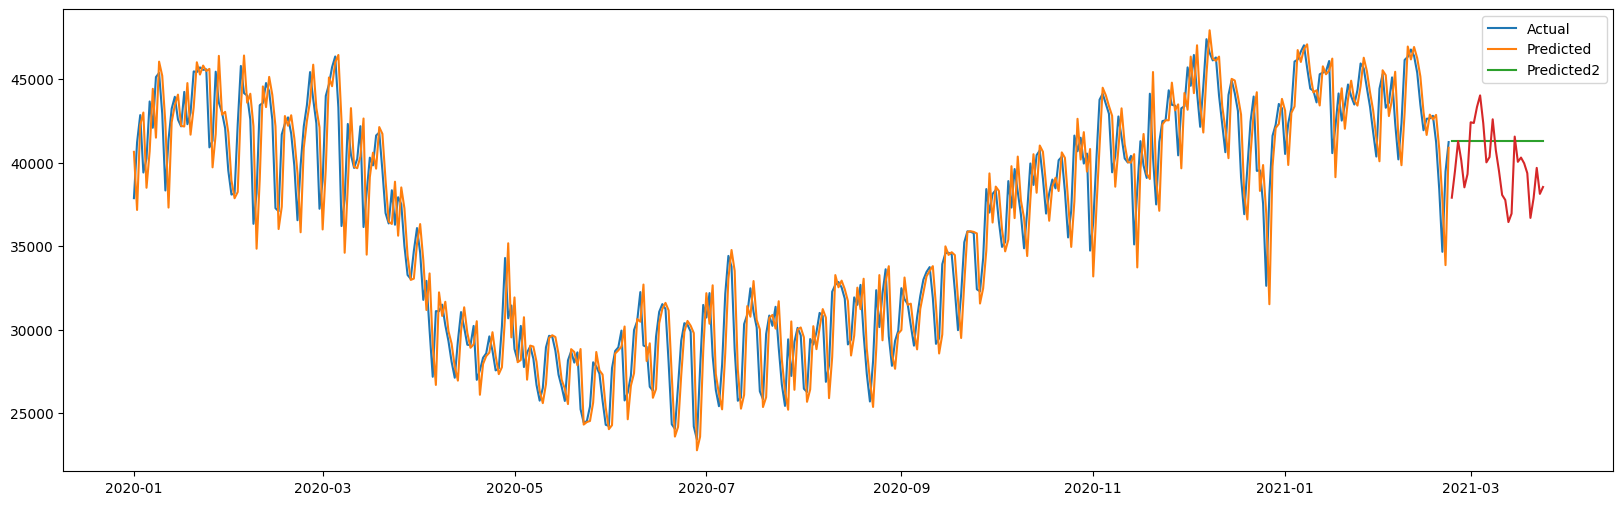

In [ ]:
train_data2 = train_data.loc['2020-01-01':]

predi = result.predict(start=train_data2.index.min(), end=train_data2.index.max())
dftry = test_data.head(30)
predicted2 = result.predict(start=dftry.index.min(), end=dftry.index.max())
plt.figure(figsize=(20,6))
plt.plot(train_data2['tsd'],label='Actual')
plt.plot(predi,label='Predicted')
plt.plot(predicted2,label='Predicted2')
plt.plot(dftry['tsd'])
plt.legend()

## **SARIMA MODEL (0, 1, 1)(2, 0, 1)**

In [ ]:
order = (0, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (2, 0, 1, 7)  # SARIMA parameters (P, D, Q, s)

# Fit the SARIMA model
model = SARIMAX(train_data['tsd'], order=order, seasonal_order=seasonal_order)
results = model.fit()

In [ ]:
sp = results.predict()

In [ ]:
predicted = results.predict(start=test_data.index.min(), end=test_data.index.max())

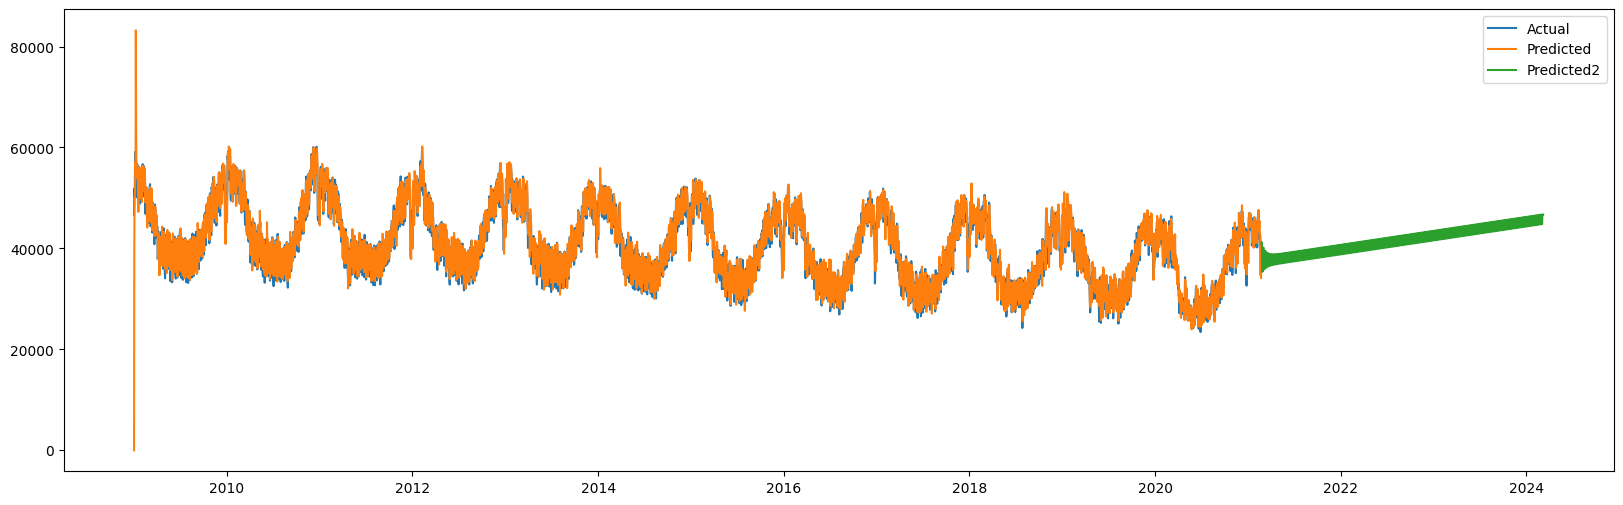

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(train_data['tsd'],label='Actual')
plt.plot(sp,label='Predicted')
plt.plot(predicted,label='Predicted2')
plt.legend()

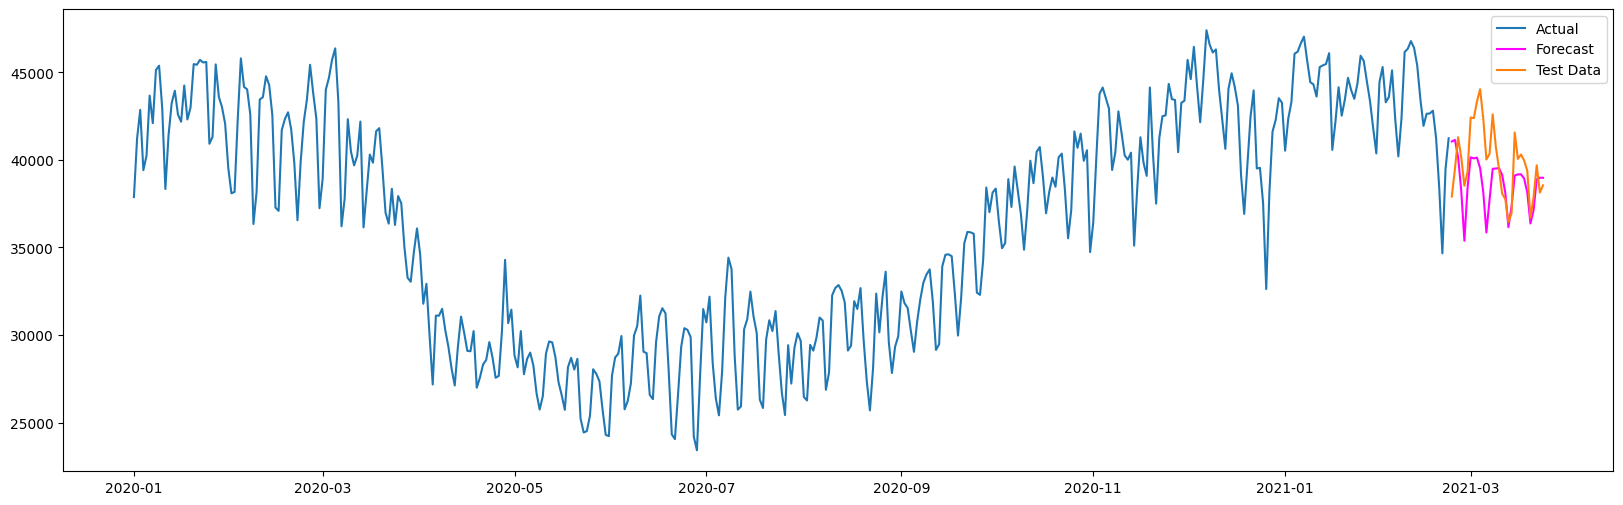

In [ ]:
train_data2 = train_data.loc['2020-01-01':]

predi = results.predict(start=train_data2.index.min(), end=train_data2.index.max())
dftry = test_data.head(30)
predicted2 = results.predict(start=dftry.index.min(), end=dftry.index.max())
forecast = results.forecast(steps = len(dftry))
plt.figure(figsize=(20,6))
plt.plot(train_data2['tsd'],label='Actual')
#plt.plot(predi,label='Train Data Prediction')
plt.plot(forecast, label='Forecast', color='magenta')
plt.plot(dftry['tsd'], label='Test Data')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(forecast,dftry['tsd'])
print(mape)

0.044417336256848405


# **CUSTOM MODEL 1: SARIMA(1,0,5)(5,1,2,7)**

In [ ]:
order = (1, 0, 5)  # ARIMA parameters (p, d, q)
seasonal_order = (5, 1, 2, 7)  # SARIMA parameters (P, D, Q, s)

# Fit the SARIMA model
model = SARIMAX(train_data['tsd'], order=order, seasonal_order=seasonal_order)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(results.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                    tsd   No. Observations:                 4436
Model:             SARIMAX(1, 0, 5)x(5, 1, [1, 2], 7)   Log Likelihood              -38465.196
Date:                                Fri, 19 Apr 2024   AIC                          76958.392
Time:                                        06:17:24   BIC                          77047.935
Sample:                                    01-01-2009   HQIC                         76989.969
                                         - 02-22-2021                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9944      0.002    436.932      0.000       0.990       0.999
ma.

In [ ]:
sp = results.predict()

In [ ]:
predicted2 = results.predict(start=test_data.index.min(), end=test_data.index.max())

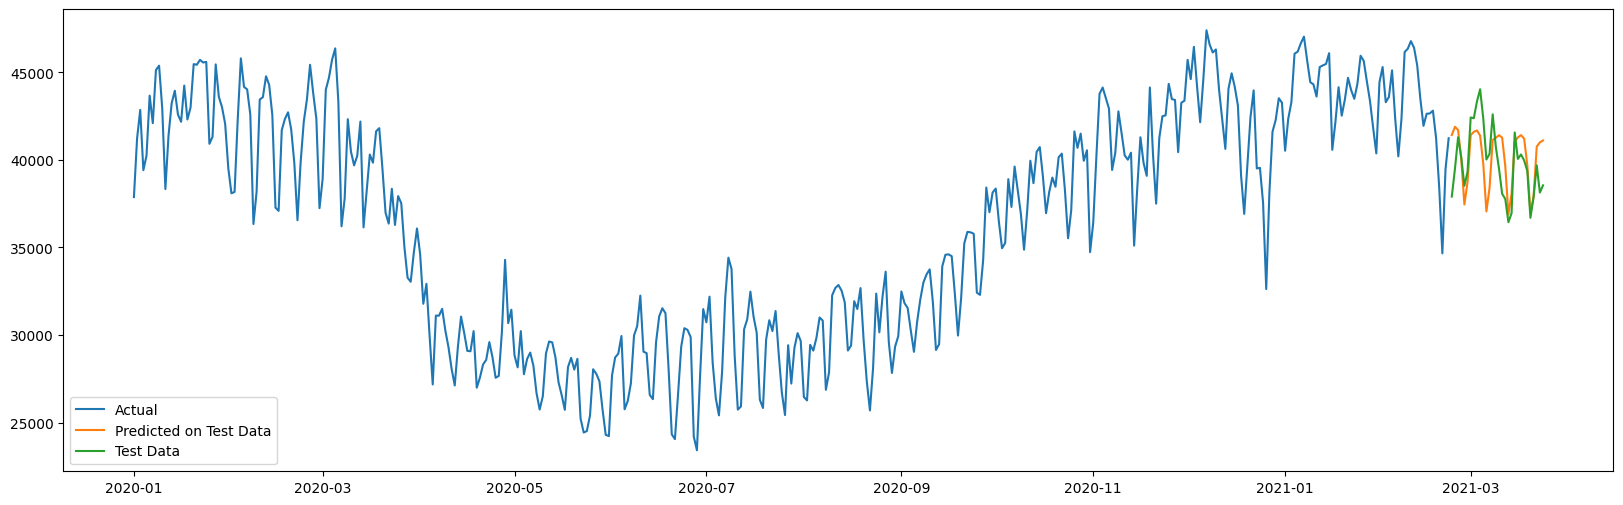

In [ ]:
train_data2 = train_data.loc['2020-01-01':]

predi = results.predict(start=train_data2.index.min(), end=train_data2.index.max())
dftry = test_data.head(30)
predicted2 = results.predict(start=dftry.index.min(), end=dftry.index.max())
forecast = results.forecast(steps=60)
#forecast
plt.figure(figsize=(20,6))
plt.plot(train_data2['tsd'],label='Actual')
#plt.plot(predi,label='Predicted')
plt.plot(predicted2,label='Predicted on Test Data')
#plt.plot(forecast, label='forecast', color='magenta')
plt.plot(dftry['tsd'], label='Test Data')
plt.legend()

In [ ]:
mape = mean_absolute_percentage_error(predicted2,dftry['tsd'])
print(mape)

0.035823052356549624


# **CUSTOM MODEL 2: SARIMA(2,0,5)(5,1,2,7)**

In [ ]:
order = (2, 0, 5)  # ARIMA parameters (p, d, q)
seasonal_order = (5, 1, 2, 7)  # SARIMA parameters (P, D, Q, s)

# Fit the SARIMA model
model = SARIMAX(train_data['tsd'], order=order, seasonal_order=seasonal_order)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(results.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                    tsd   No. Observations:                 4436
Model:             SARIMAX(2, 0, 5)x(5, 1, [1, 2], 7)   Log Likelihood              -38464.882
Date:                                Fri, 19 Apr 2024   AIC                          76959.764
Time:                                        06:25:58   BIC                          77055.703
Sample:                                    01-01-2009   HQIC                         76993.597
                                         - 02-22-2021                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6031      0.256      2.357      0.018       0.102       1.105
ar.

In [ ]:
sp = results.predict()

In [ ]:
predicted2 = results.predict(start=test_data.index.min(), end=test_data.index.max())

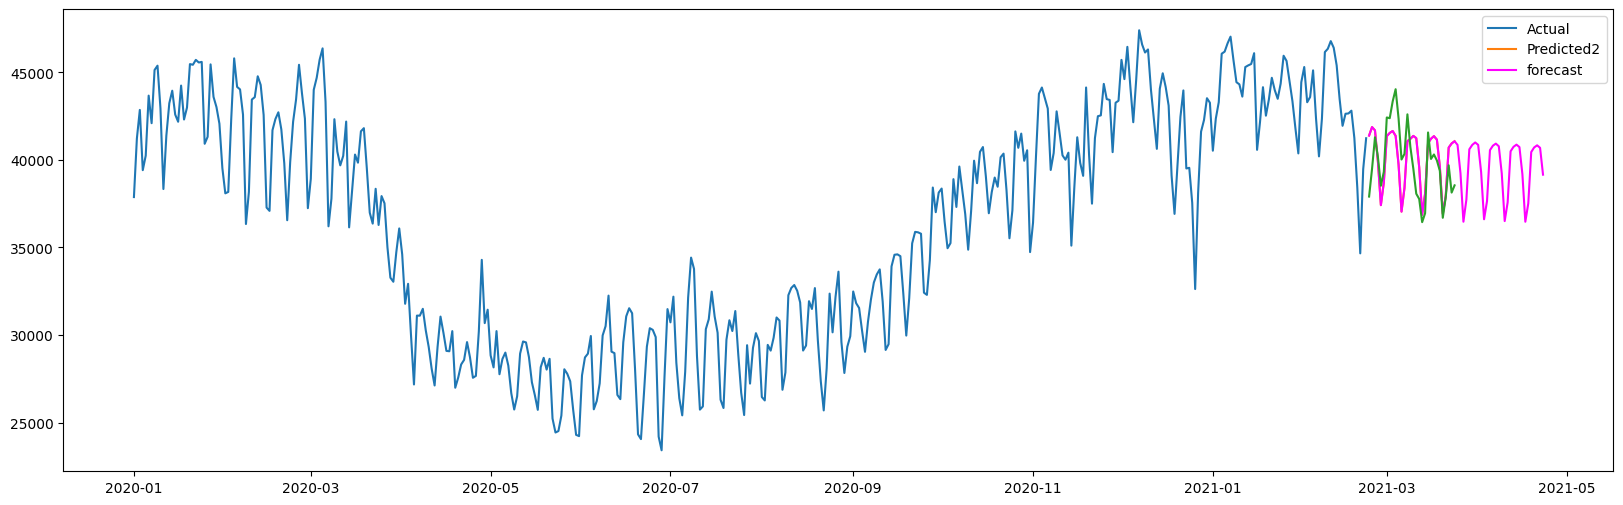

In [ ]:
train_data2 = train_data.loc['2020-01-01':]

predi = results.predict(start=train_data2.index.min(), end=train_data2.index.max())
dftry = test_data.head(30)
predicted2 = results.predict(start=dftry.index.min(), end=dftry.index.max())
forecast = results.forecast(steps=60)
#forecast
plt.figure(figsize=(20,6))
plt.plot(train_data2['tsd'],label='Actual')
#plt.plot(predi,label='Predicted')
plt.plot(predicted2,label='Predicted2')
plt.plot(forecast, label='forecast', color='magenta')
plt.plot(dftry['tsd'])
plt.legend()

In [ ]:
mape = mean_absolute_percentage_error(predicted2,dftry['tsd'])
print(mape)

0.03578263064827293


# **CUSTOM MODEL 3 SARIMA(1,1,5)(5,1,2,7)**

In [ ]:
order = (1, 1, 5)  # ARIMA parameters (p, d, q)
seasonal_order = (5, 1, 2, 7)  # SARIMA parameters (P, D, Q, s)

# Fit the SARIMA model
model = SARIMAX(train_data['tsd'], order=order, seasonal_order=seasonal_order)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
sp = results.predict()

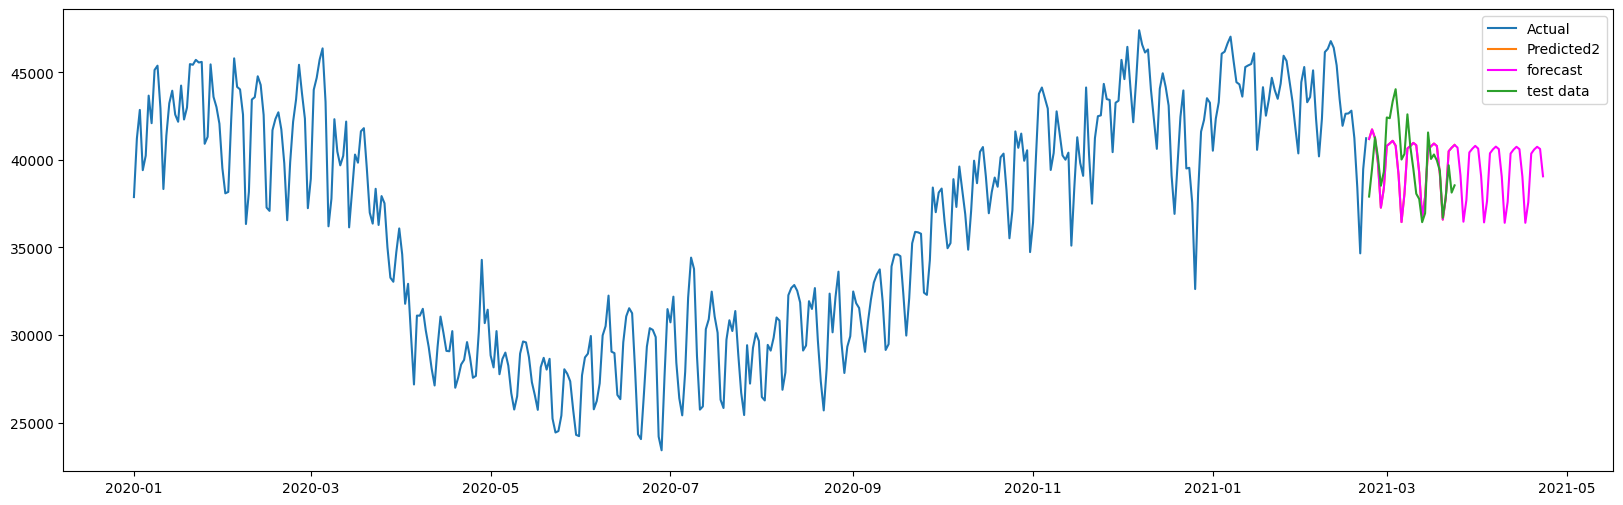

In [ ]:
train_data2 = train_data.loc['2020-01-01':]

predi = results.predict(start=train_data2.index.min(), end=train_data2.index.max())
dftry = test_data.head(30)
predicted2 = results.predict(start=dftry.index.min(), end=dftry.index.max())
forecast = results.forecast(steps=60)
#forecast
plt.figure(figsize=(20,6))
plt.plot(train_data2['tsd'],label='Actual')
#plt.plot(predi,label='Predicted')
plt.plot(predicted2,label='Predicted2')
plt.plot(forecast, label='forecast', color='magenta')
plt.plot(dftry['tsd'], label='test data')
plt.legend()

In [ ]:
print(results.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                    tsd   No. Observations:                 4436
Model:             SARIMAX(1, 1, 5)x(5, 1, [1, 2], 7)   Log Likelihood              -38505.851
Date:                                Fri, 19 Apr 2024   AIC                          77039.702
Time:                                        06:33:08   BIC                          77129.242
Sample:                                    01-01-2009   HQIC                         77071.278
                                         - 02-22-2021                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9993      0.002   -415.170      0.000      -1.004      -0.995
ma.

In [ ]:
mape = mean_absolute_percentage_error(predicted2,dftry['tsd'])
print(mape)

0.03657592201182478


# **CUSTOM MODEL 4 SARIMA(2,1,1)(5,1,2,7)**

In [ ]:
order = (2, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (5, 1, 2, 7)  # SARIMA parameters (P, D, Q, s)

# Fit the SARIMA model
model = SARIMAX(train_data['tsd'], order=order, seasonal_order=seasonal_order)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(results.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                    tsd   No. Observations:                 4436
Model:             SARIMAX(2, 1, 1)x(5, 1, [1, 2], 7)   Log Likelihood              -38491.288
Date:                                Fri, 19 Apr 2024   AIC                          77004.576
Time:                                        06:39:50   BIC                          77074.929
Sample:                                    01-01-2009   HQIC                         77029.386
                                         - 02-22-2021                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8555      0.023     37.095      0.000       0.810       0.901
ar.

In [ ]:
sp = results.predict()

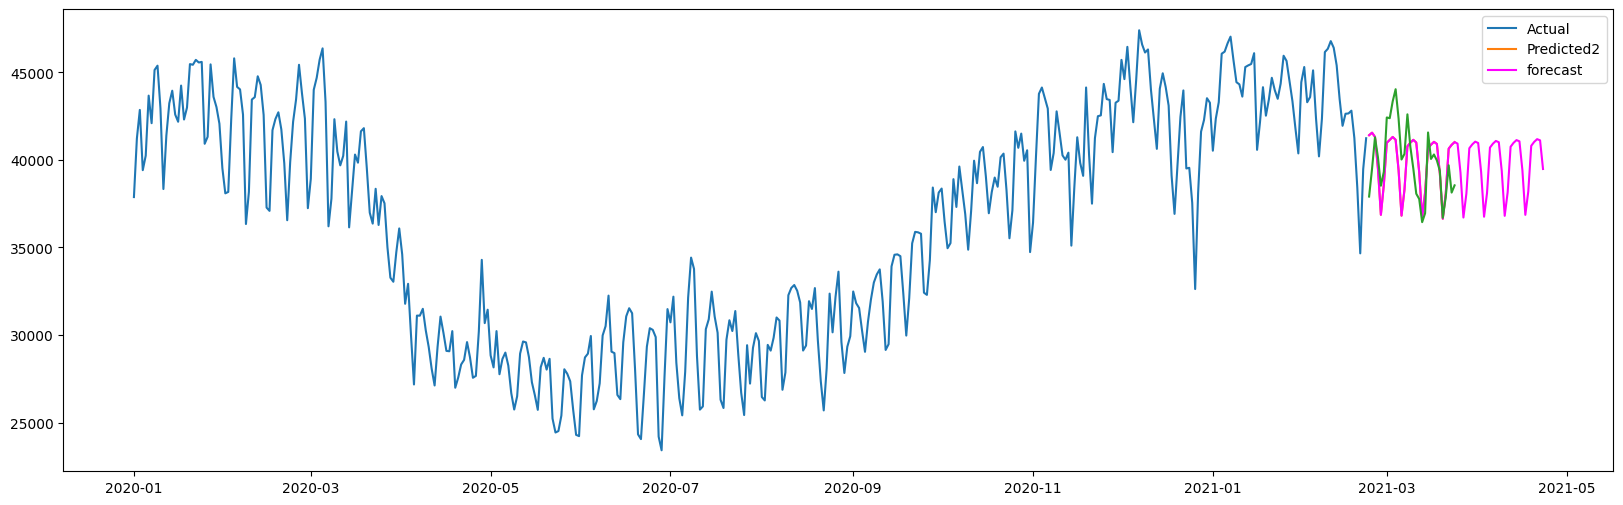

In [ ]:
train_data2 = train_data.loc['2020-01-01':]

predi = results.predict(start=train_data2.index.min(), end=train_data2.index.max())
dftry = test_data.head(30)
predicted2 = results.predict(start=dftry.index.min(), end=dftry.index.max())
forecast = results.forecast(steps=60)
#forecast
plt.figure(figsize=(20,6))
plt.plot(train_data2['tsd'],label='Actual')
#plt.plot(predi,label='Predicted')
plt.plot(predicted2,label='Predicted2')
plt.plot(forecast, label='forecast', color='magenta')
plt.plot(dftry['tsd'])
plt.legend()

In [ ]:
mape = mean_absolute_percentage_error(predicted2,dftry['tsd'])
print(mape)

0.03656699166794601


# **BEST MODEL: SARIMA(2,0,5)(5,1,2,7)**

In [ ]:
order = (2, 0, 5)  # ARIMA parameters (p, d, q)
seasonal_order = (5, 1, 2, 7)  # SARIMA parameters (P, D, Q, s)

# Fit the SARIMA model
model = SARIMAX(train_data['tsd'], order=order, seasonal_order=seasonal_order)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(results.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                    tsd   No. Observations:                 4436
Model:             SARIMAX(2, 0, 5)x(5, 1, [1, 2], 7)   Log Likelihood              -38464.882
Date:                                Fri, 19 Apr 2024   AIC                          76959.764
Time:                                        06:46:36   BIC                          77055.703
Sample:                                    01-01-2009   HQIC                         76993.597
                                         - 02-22-2021                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6031      0.256      2.357      0.018       0.102       1.105
ar.

In [ ]:
sp = results.predict()

In [ ]:
predicted2 = results.predict(start=test_data.index.min(), end=test_data.index.max())

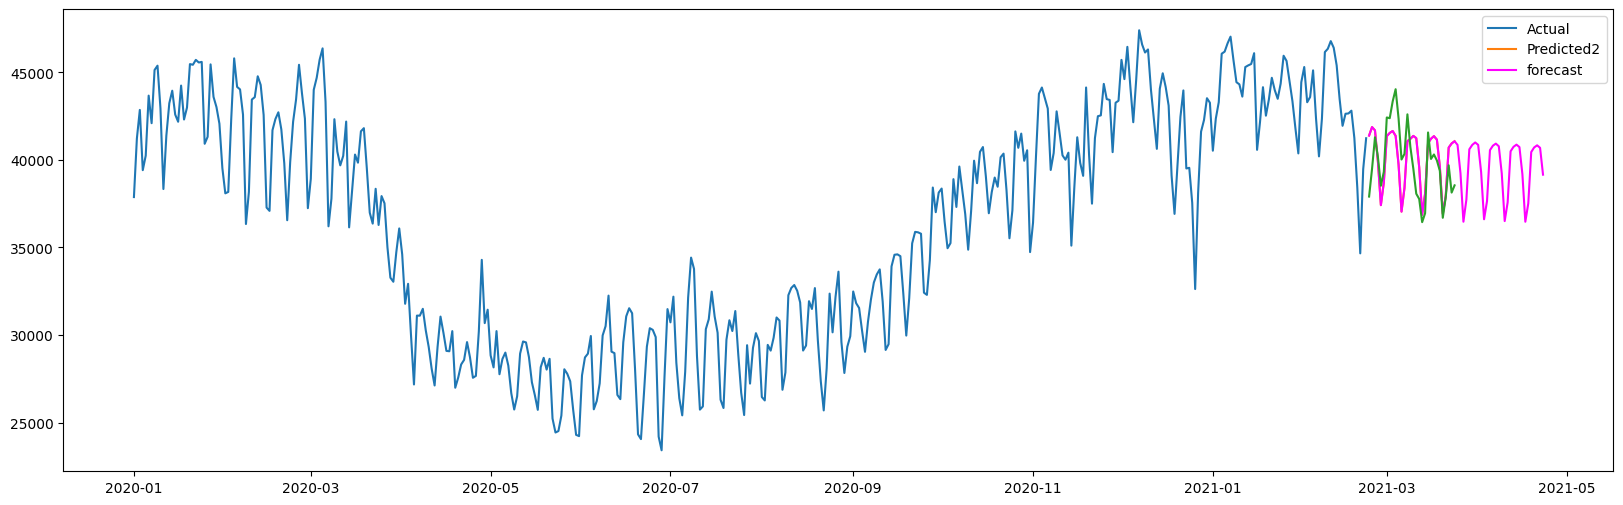

In [ ]:
train_data2 = train_data.loc['2020-01-01':]

predi = results.predict(start=train_data2.index.min(), end=train_data2.index.max())
dftry = test_data.head(30)
predicted2 = results.predict(start=dftry.index.min(), end=dftry.index.max())
forecast = results.forecast(steps=60)
#forecast
plt.figure(figsize=(20,6))
plt.plot(train_data2['tsd'],label='Actual')
#plt.plot(predi,label='Predicted')
plt.plot(predicted2,label='Predicted2')
plt.plot(forecast, label='forecast', color='magenta')
plt.plot(dftry['tsd'])
plt.legend()

In [ ]:
mape = mean_absolute_percentage_error(predicted2,dftry['tsd'])
print(mape)

0.03578263064827293


In [ ]:
residuals = results.resid

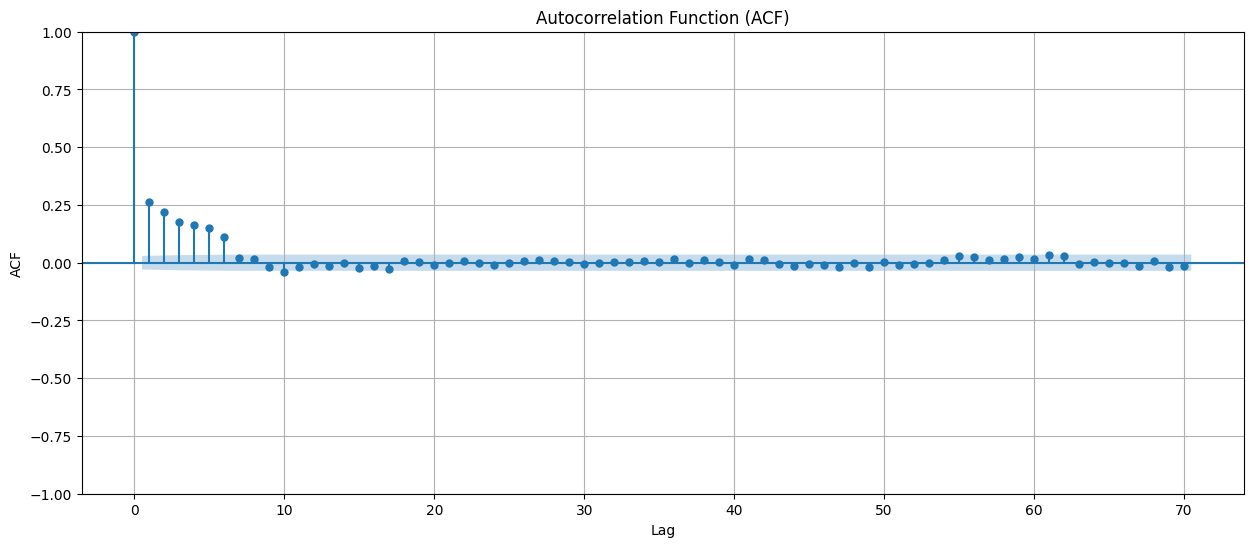

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(residuals, lags=70, ax = ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

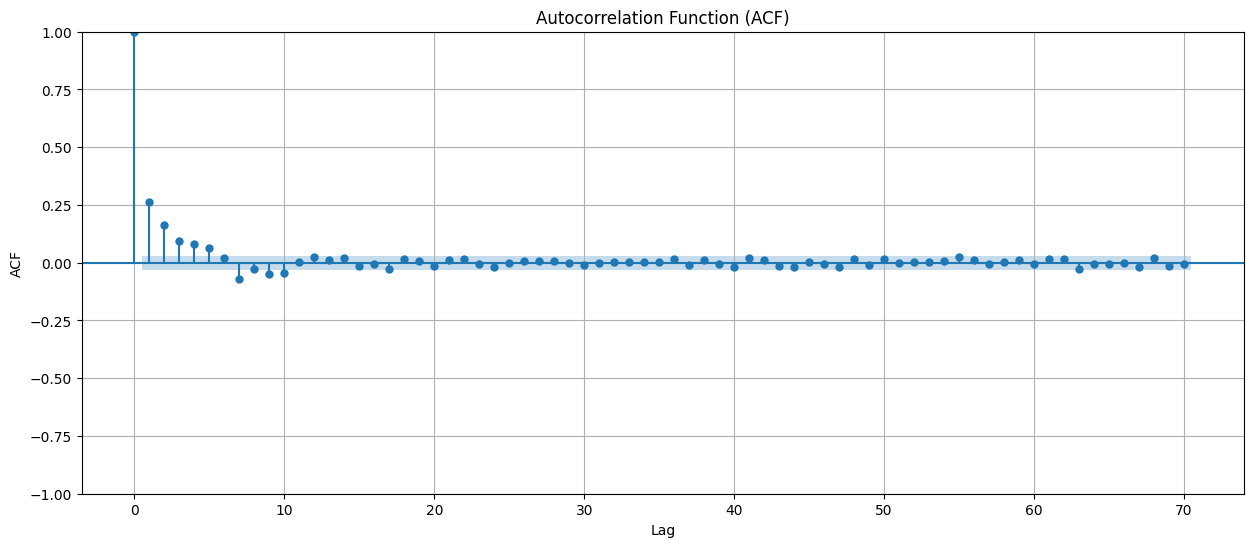

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(residuals, lags=70, ax = ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# **Rolling Forecast**

In [ ]:
rolling_mean = train_data['tsd'].rolling(window=30).mean()

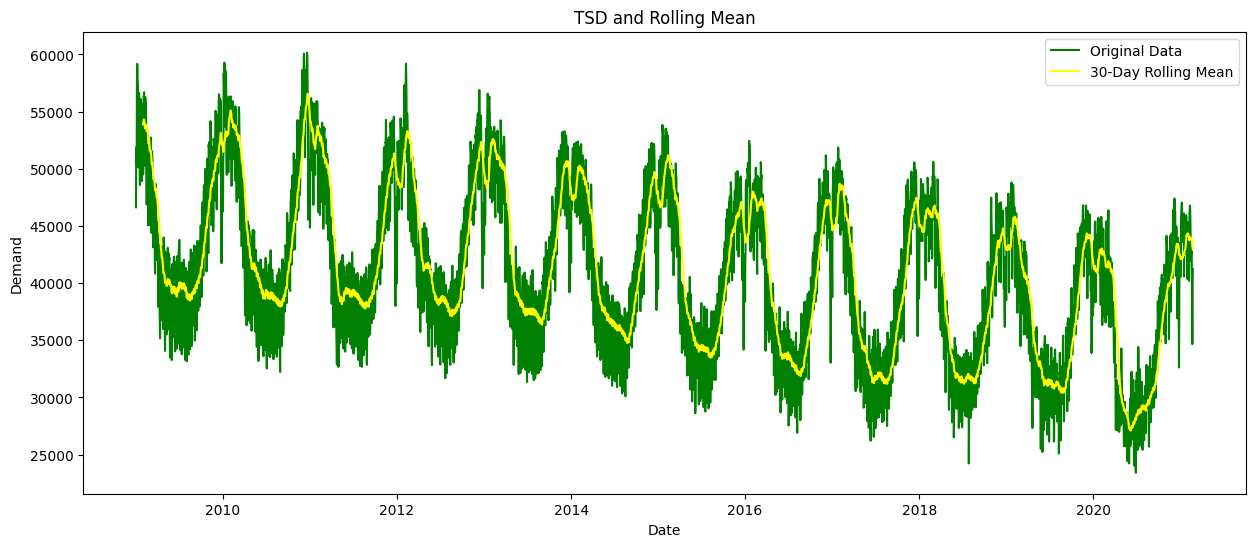

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['tsd'], label='Original Data', color='green')
plt.plot(rolling_mean.index, rolling_mean, label='30-Day Rolling Mean', color='yellow')
plt.title('TSD and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [ ]:
forecast_period = 30
test_data['Forecast'] = rolling_mean.shift(-forecast_period)

<ipython-input-170-6482828d9686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Forecast'] = rolling_mean.shift(-forecast_period)


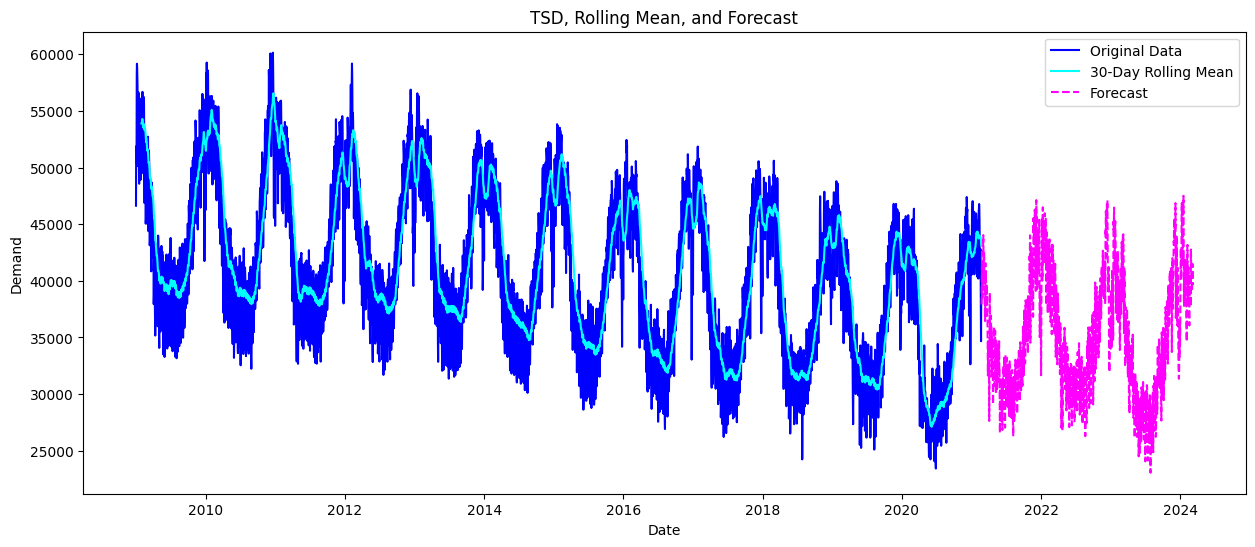

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['tsd'], label='Original Data', color='blue')
plt.plot(rolling_mean.index, rolling_mean, label='30-Day Rolling Mean', color='cyan')
plt.plot(test_data.index, test_data['tsd'], label='Forecast', color='magenta', linestyle='--')
plt.title('TSD, Rolling Mean, and Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# **Thank you!**